# BATTLE GROUND DATA SET

<h2> 1. 데이터 셋 확인하기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
df_train = pd.read_csv('train_V2.csv')
df_test = pd.read_csv('test_V2.csv')

In [5]:
df_train.shape, df_test.shape

((4446966, 29), (1934174, 28))

각 파일을 확인해보니<br>
train 할 데이터의 수는 4,446,966 개,<br>
test 할 데이터의 수는 1,934,175개 입니다.<br>

In [6]:
df_train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

각각의 attribute 가 있고, 예측해야할 것은 'winPlacePerc

In [7]:
df_test.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')

여기서 각각의 attribute를 알아보면<br>
groupId - 일치 항목 내의 그룹을 식별하는 정수 ID. 같은 조가 다른 경기에서 뛰면 매번 groupId가 달라짐<br>
matchId - 일치 항목을 식별하는 정수 ID. 훈련과 테스트 세트 모두에 있는 매치는 없음<br>
assists - 이 선수가 팀 동료에 의해 희생된 적 선수의 수입니다.<br>
boosts - 사용된 부스트 품목 수입니다.<br>
damageDealt - 총 피해<br>
DBNO - 적을 다운시켰지만, 아웃은 되지 않은 적의 수<br>
headshotKills - 헤드샷으로 죽은 적 선수 수<br>
heals - 사용된 힐링 품목 수입니다.<br>
killPlace - 살해된 적 선수의 수 순위.<br>
killpoints - 킬로 죽은 것 외의 외부 플레이어 순위. <br>
kills - 살해된 적군 선수 수.<br>
killStreaks - 짧은 시간 내에 살해된 최대 적군 선수 수입니다.<br>
longKill - 사망 당시 사망한 선수와 선수 사이의 가장 긴 거리.<br>
maxPlace - 경기에서 최악의 위치에 대한 데이터, 스킵가능<br>
numGroups - 일치 항목에 대한 데이터가 있는 그룹 수입니다.<br>
revives - 이 선수가 팀 동료들을 부활시킨 횟수.<br>
rideDistance - 미터 단위로 측정된 차량의 총 주행 거리<br>
roadKills - 차량 내에서의 살인 횟수.<br>
swimDistance - 미터 단위로 측정된 수영으로 이동한 거리<br>
teamKills - 이 선수가 같은 팀원을 죽인 횟수.<br>
vehicleDestroys - 파괴된 차량 수입니다.<br>
walkDistance - 미터 단위로 도보로 이동한 총 거리.<br>
weaponsAcquired - 수집된 무기 수<br>
winpoints - 선수의 우승 기반 외부 랭킹<br>
winPlacePerc - 예측 대상. 이것은 백분위수 우승 배치로서, 1은 1에 해당하고, 0은 경기에서의 꼴찌에 해당<br>

파일을 출력해보면

In [8]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


각 feature를 살펴보면

In [9]:
df_train.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [10]:
df_train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [11]:
df_train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [12]:
df_test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

train 데이터에서 winPlacePerc 피쳐에 1개의 결측치가 있당

<h2> 2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

<h3> 2-1. assists

In [13]:
df_copy = df_train.copy()

In [14]:
df_train['assists'].mean()

0.23381492010507837

In [15]:
df_train['assists'].quantile(0.99)

3.0

In [16]:
df_train['assists'].max()

22

Text(0.5, 1.0, 'Count of Assistant')

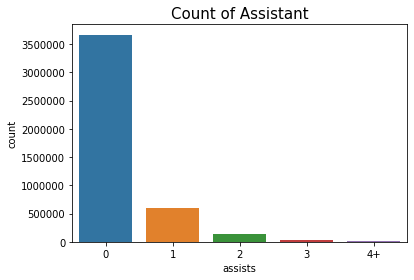

In [17]:
df_copy1 = df_train.copy()
df_copy1.loc[df_copy1['assists'] > df_copy1['assists'].quantile(0.99)] = '4+'
sns.countplot(df_copy1['assists'].astype('str').sort_values())
plt.title("Count of Assistant",fontsize=15)

대부분의 사람들이 어시스트를 하지 않는다

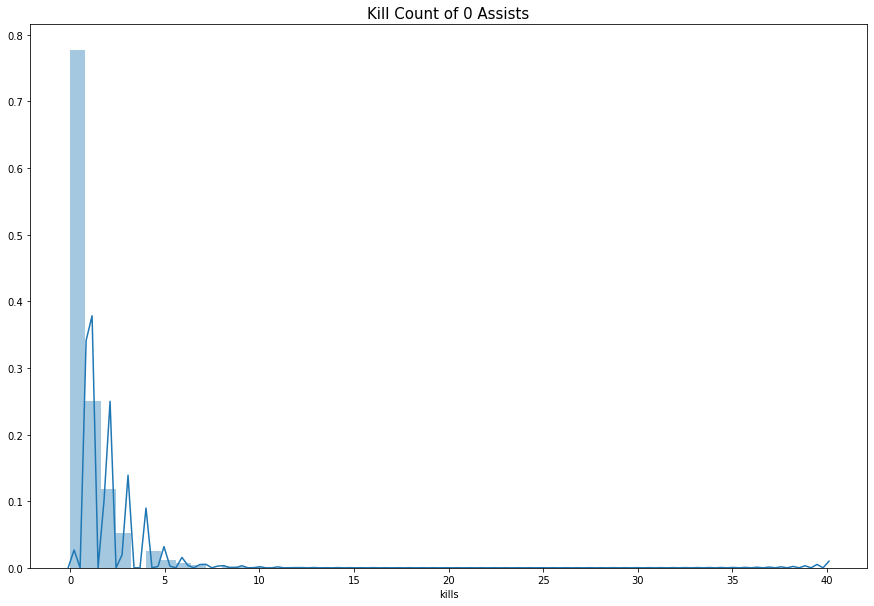

In [18]:
df_copy2 = df_train.copy()
df_copy2 = df_copy2[df_copy2['assists']==0]
plt.figure(figsize=(15, 10))
plt.title("Kill Count of 0 Assists",fontsize=15)
sns.distplot(df_copy2['kills'])

어이스트가 없는 플레이어는 킬 또한 하지 못한다 ㅠㅠ

<h2> 2-2. Heal & Boosts


In [19]:
df_train['boosts'].mean(), df_train['heals'].mean()

(1.1069077209045448, 1.370147196987789)

In [20]:
df_train['boosts'].quantile(0.99), df_train['heals'].quantile(0.99)

(7.0, 12.0)

In [21]:
df_train['boosts'].max(), df_train['heals'].max()

(33, 80)

Text(0.5, 1.0, 'Count of Boosts used')

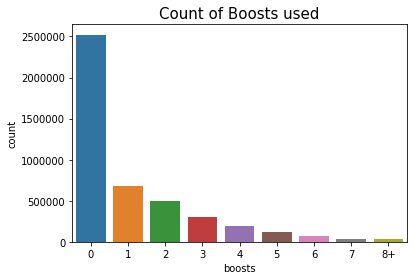

In [22]:
df_copy3 = df_train.copy()
df_copy3.loc[df_copy3['boosts'] > df_copy3['boosts'].quantile(0.99)] = '8+'
sns.countplot(df_copy3['boosts'].astype('str').sort_values())
plt.title("Count of Boosts used",fontsize=15)

Text(0.5, 1.0, 'Count of Heal used')

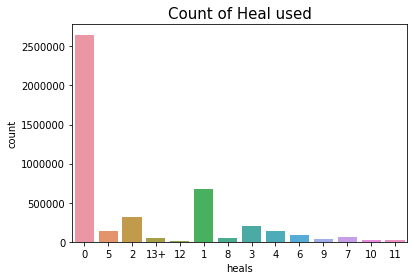

In [23]:
df_copy4 = df_train.copy()
df_copy4.loc[df_copy4['heals'] > df_copy4['heals'].quantile(0.99)] = '13+'
sns.countplot(df_copy4['heals'].astype('str'))
plt.title("Count of Heal used",fontsize=15)

대부분의 사람들이 boost 아이템과 heal 아이템을 사용하지 않는다<br>
이러한 아이템은 당연히 우승과 어떤 관련이 있을까?(당연 많이쓸수록 우승확률이 높아지겠찌만)

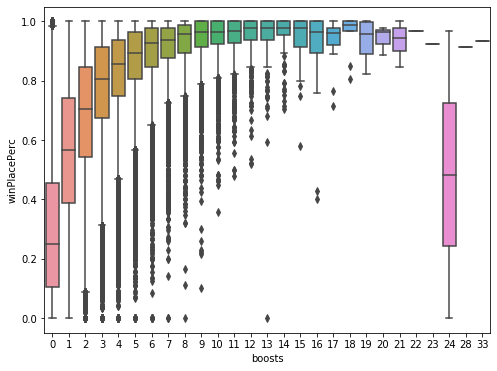

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='boosts', y="winPlacePerc", data=df_train)

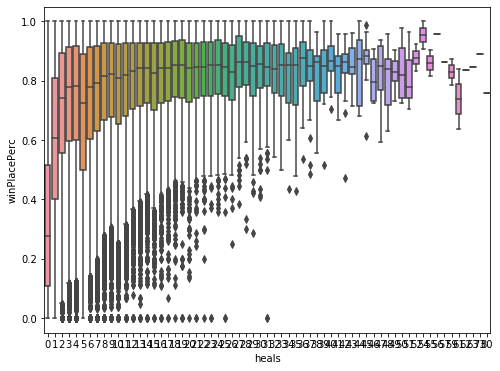

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='heals', y="winPlacePerc", data=df_train)

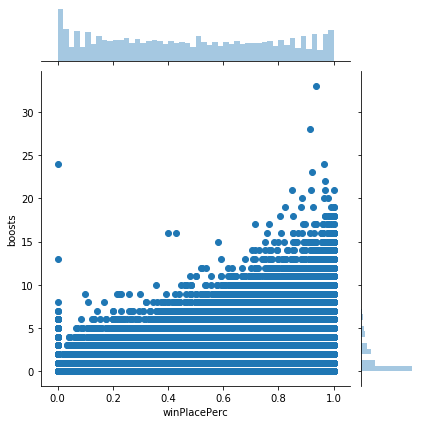

In [26]:
sns.jointplot(x="winPlacePerc", y="boosts", data=df_train)

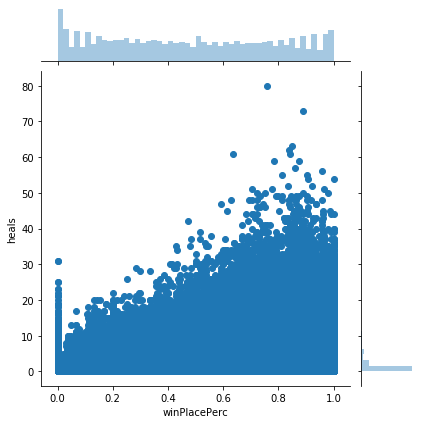

In [27]:
sns.jointplot(x="winPlacePerc", y="heals", data=df_train)

이로써 부스트, 힐링 아이템은 우승과 양의 상관관계를 가진다!

<h2> 2-3. Kill

In [28]:
df_train['kills'].mean()

0.9247833241810259

In [29]:
df_train['kills'].quantile(0.99)

7.0

In [30]:
df_train['kills'].max()

72

Text(0.5, 1.0, 'Count of Kill')

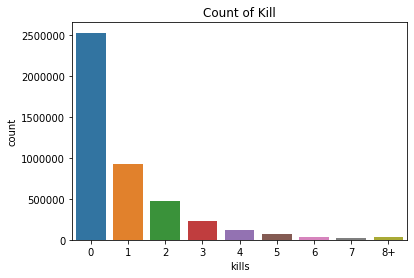

In [40]:
df_copy = df_train.copy()
df_copy.loc[df_copy['kills'] > 7 ] = '8+'
sns.countplot(df_copy['kills'].astype(str).sort_values())
plt.title('Count of Kill')

대부분의 플레이어가 1킬도 못하고 죽는당 ㅠㅠ

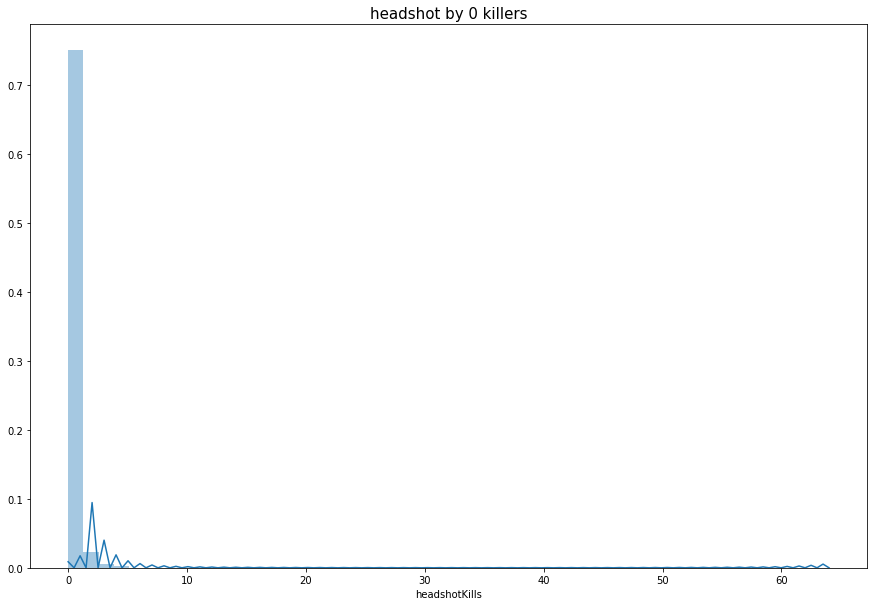

In [37]:
df_copy = df_train.copy()
df_copy = df_copy[df_copy['kills'] > 0]
plt.figure(figsize=(15, 10))
plt.title('headshot by 0 killers',fontsize=15)
sns.distplot(df_train['headshotKills'])

또한 보통 플레이어가 헤드샷을 하지 않고(못하고), 1에서 2 해드샷 킬 정도 한다

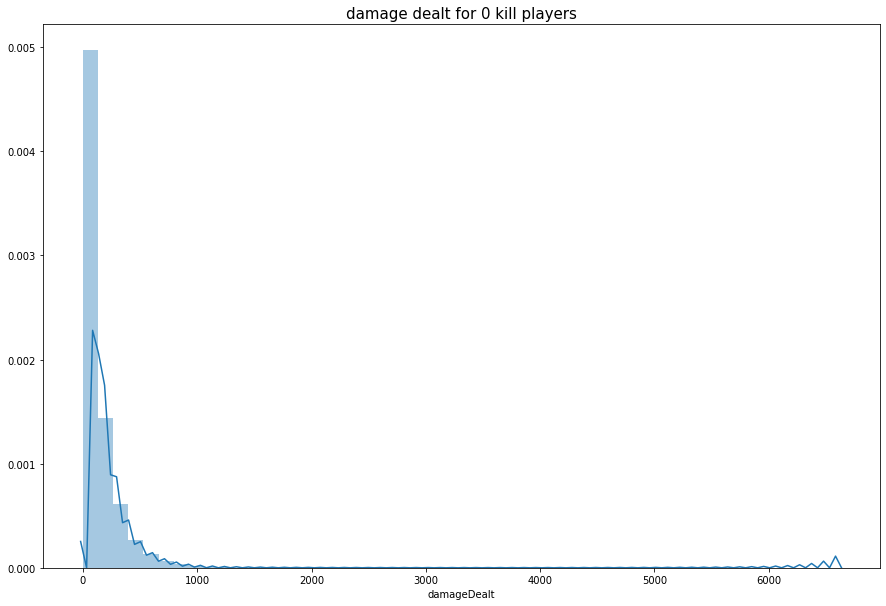

In [39]:
df_copy = df_train.copy()
df_copy = df_copy[df_copy['kills'] == 0]
plt.figure(figsize=(15, 10))
plt.title('damage dealt for 0 kill players',fontsize=15)
sns.distplot(df_train['damageDealt'])

0킬 한 플레이어들은 또한 다른 플레이어들에게 데미지를 주지 못한다..

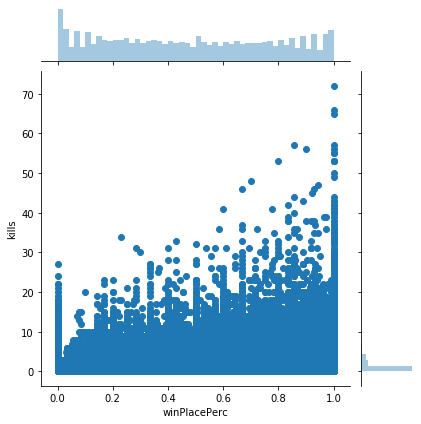

In [41]:
sns.jointplot(x="winPlacePerc", y="kills", data=df_train)

킬 수 또한 우승확률과 양의 상관관계가 이따

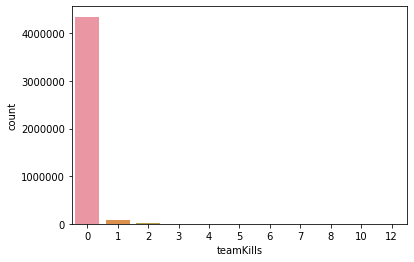

In [56]:
sns.countplot(df_train['teamKills'])

대부분의 사람들이 팀킬은 하지 않는다

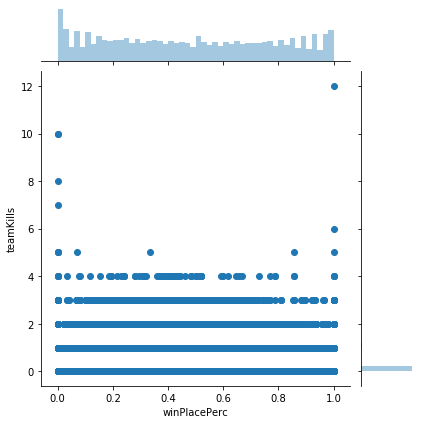

In [46]:
sns.jointplot(x="winPlacePerc", y="teamKills", data=df_train)

<h2> 2-4. Revive

In [58]:
df_train['revives'].value_counts()

0     3859867
1      470110
2       95545
3       17333
4        3102
5         606
6         142
7          72
8          43
9          26
10         25
11         23
15         13
12         12
14         10
13          7
18          7
16          6
17          6
19          3
23          3
20          2
32          1
28          1
39          1
Name: revives, dtype: int64

In [59]:
df_train['revives'].quantile(0.99)

2.0

In [94]:
df_train[df_train['revives'] > 3]['revives'].sum()

19034

(-1.1063026441166819,
 1.100300125985629,
 -1.104513112453717,
 1.1068276331584321)

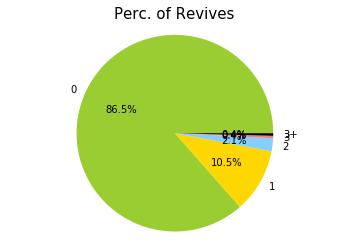

In [107]:
labels = ['0', '1', '2', '3', '3+']
sizes = [3859867, 470110, 95545, 17333, 19034]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'black']
explode = (1, 1, 1, 1, 1)
plt.title("Perc. of Revives", fontsize=15)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', labels=labels)
plt.axis('equal')

약 86.5% 플레이어가 부활하지 못한다

<h2> 2-5. Distance

Text(0.5, 1.0, 'Ride Distance')

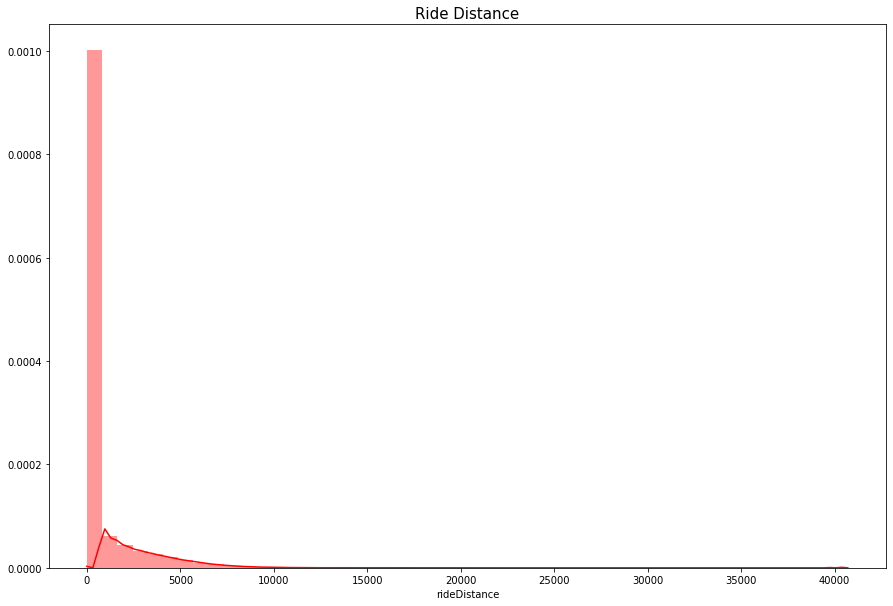

In [112]:
plt.figure(figsize=(15, 10))
sns.distplot(df_train['rideDistance'], color='red')
plt.title('Ride Distance', fontsize=15)

Text(0.5, 1.0, 'Swim Distance')

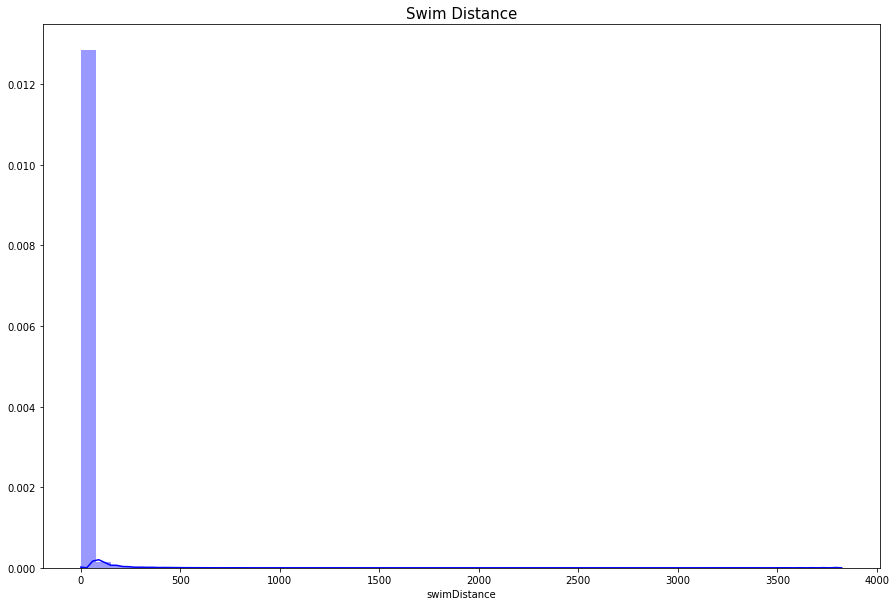

In [113]:
plt.figure(figsize=(15, 10))
sns.distplot(df_train['swimDistance'], color='blue')
plt.title('Swim Distance', fontsize=15)

Text(0.5, 1.0, 'Walk Distance')

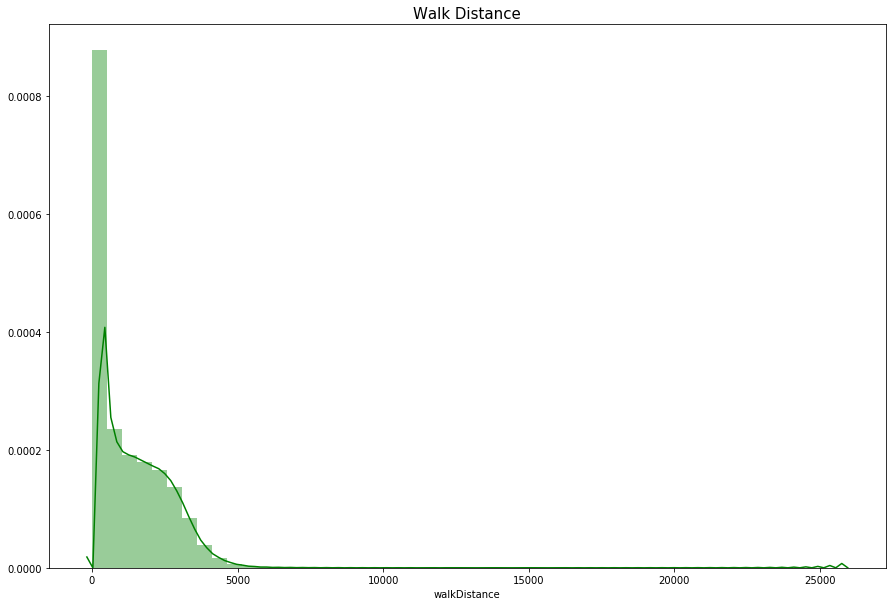

In [115]:
plt.figure(figsize=(15, 10))
sns.distplot(df_train['walkDistance'], color='green')
plt.title('Walk Distance', fontsize=15)

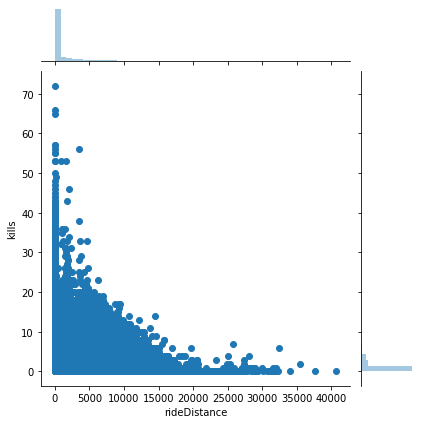

In [118]:
sns.jointplot(x="rideDistance", y="kills", data=df_train)

차를 타고 가는 거리가 멀어질 수록 킬 수는 적어진다

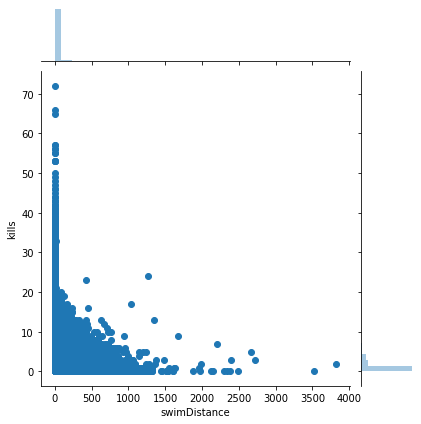

In [119]:
sns.jointplot(x="swimDistance", y="kills", data=df_train)

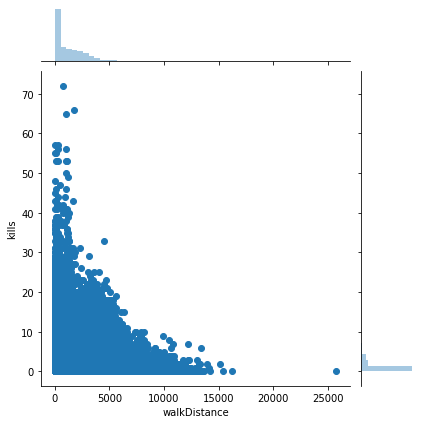

In [120]:
sns.jointplot(x="walkDistance", y="kills", data=df_train)

거리는 길어질 수록 킬 수가 적어진다

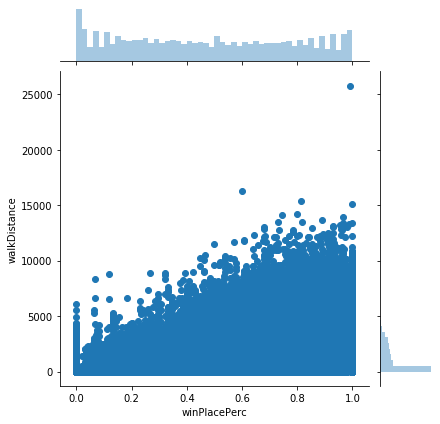

In [121]:
sns.jointplot(x="winPlacePerc", y="walkDistance", data=df_train)

하지만 거리가 길어질 수록 승리 확률은 높아진다

<h2> 2-6. Others

In [122]:
df_train['vehicleDestroys'].value_counts()

0    4413212
1      32422
2       1223
3         95
4         11
5          3
Name: vehicleDestroys, dtype: int64

In [125]:
df_train[df_train['vehicleDestroys']>1]['vehicleDestroys'].sum()

2790

(-1.1030765623279821,
 1.100146502967999,
 -1.1044478733669714,
 1.1018277012527933)

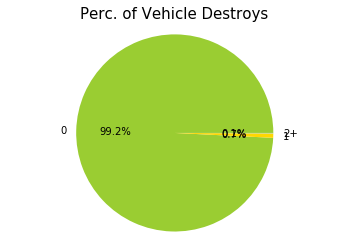

In [127]:
labels = ['0', '1', '2+']
sizes = [4413212, 32422, 2790]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0, 0)
plt.title("Perc. of Vehicle Destroys", fontsize=15)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', labels=labels)
plt.axis('equal')

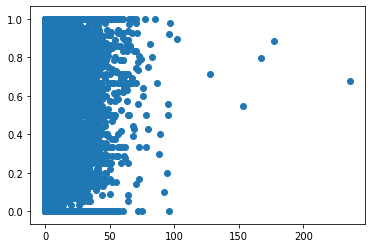

In [129]:
plt.scatter(x="weaponsAcquired",y="winPlacePerc", data=df_train)

<h2> 2-7. Corr.

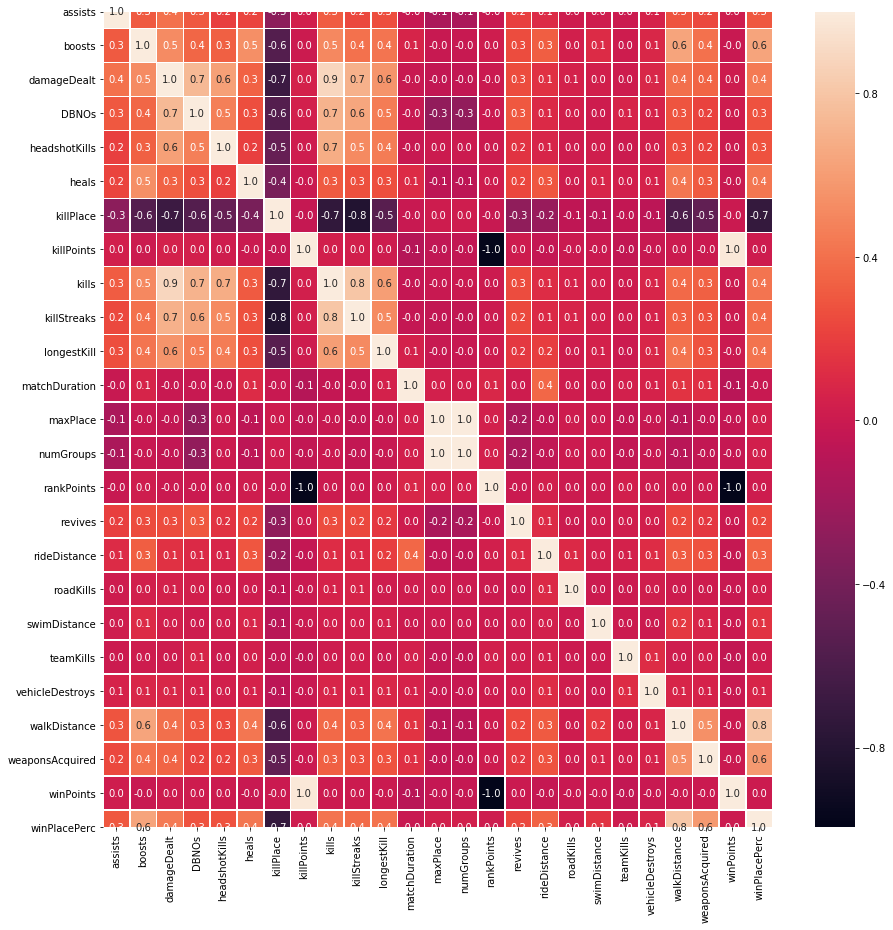

In [135]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()